In [1]:
from netCDF4 import Dataset
from netCDFfunc.utility import get_data_sequence, get_data_A, get_data_by_date, save_img, show_img, masking

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

import math

# 1

In [21]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1/'

In [66]:
dsin = get_data_by_date(base_dir=base_dir,
                 get_data_func=get_data_A,
                 var_name='sst',
                 start_date=(2020,1,1),
                 end_date=(2020,8,31),
                 specific_date=(1,1))

  0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
sst = dsin[(1,1)][0]

In [68]:
dsin[(1,1)]

[array([[-999.       , -999.       , -999.       , ..., -999.       ,
         -999.       , -999.       ],
        [-999.       , -999.       , -999.       , ..., -999.       ,
         -999.       , -999.       ],
        [-999.       , -999.       , -999.       , ..., -999.       ,
         -999.       , -999.       ],
        ...,
        [  -1.7200012,   -1.7399902,   -1.75     , ...,   -1.75     ,
           -1.75     ,   -1.730011 ],
        [  -1.7399902,   -1.769989 ,   -1.7900085, ...,   -1.7900085,
           -1.7799988,   -1.7399902],
        [  -1.7999878,   -1.7999878,   -1.7999878, ...,   -1.7999878,
           -1.7999878,   -1.7999878]], dtype=float32)]

In [69]:
ds_average = Dataset('/Volumes/T7/new_data/processed_data_example/nc/1_30_years_dataset_1_global.nc', 'r', format='NETCDF4')
avg = ds_average.variables['avgsst'][:].data[0]

In [93]:
ds_pctl = Dataset('/Volumes/T7/new_data/processed_data_example/nc/7_30_years_dataset_1_90_percentile.nc', 'r', format='NETCDF4')
pctl = ds_pctl.variables['90pctlSST'][:].data[0]

In [94]:
ds_std = Dataset('/Volumes/T7/new_data/processed_data_example/nc/19_30_years_dataset_1_global_std.nc', 'r', format='NETCDF4')
std = ds_std.variables['std'][:].data[0]

In [95]:
ice = get_data_by_date(base_dir=base_dir,
                 get_data_func=get_data_A,
                 var_name='ice',
                 start_date=(2020,1,1),
                 end_date=(2020,8,31),
                 specific_date=(1,1),
                      is_mask=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
ice = ice[(1,1)][0]

In [97]:
nw = (280, 624, 392, 1136)
rok = (440, 572, 440, 600)

In [98]:
np.place(pctl, pctl[:,:] == -999, np.nan)

In [99]:
anomally = (sst - pctl)

In [100]:
anomally

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.0610013 , -0.08099031, -0.09100008, ..., -0.09100008,
        -0.09100008, -0.07101107],
       [-0.07099032, -0.1009891 , -0.12100863, ..., -0.12100863,
        -0.11099887, -0.07099032],
       [-0.13098788, -0.13098788, -0.13098788, ..., -0.13098788,
        -0.13098788, -0.13098788]], dtype=float32)

In [101]:
#np.place(anomally, anomally[:,:] == 0, np.nan)
np.place(anomally, anomally[:,:] < 0, 0)

In [102]:
def crop(arr, tup):
    return arr[tup[0]:tup[1], tup[2]:tup[3]]

In [103]:
grade = np.ceil(anomally/std)

/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_31161/262369734.py:1: RuntimeWarning: divide by zero encountered in true_divide
  grade = np.ceil(anomally/std)
/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_31161/262369734.py:1: RuntimeWarning: invalid value encountered in true_divide
  grade = np.ceil(anomally/std)


In [106]:
np.place(grade, grade[:,:] < 0, 0)
np.place(grade, grade[:,:] > 5, 5)

In [107]:
grade = masking(grade, np.invert(ice), fill_value=-1)

In [125]:
save_img(grade, '/Volumes/T7/intermediate_output/additional_img_1/global_grade_1', grade=True)

# 3

In [126]:
ds_average_2 = Dataset('/Volumes/T7/new_data/processed_data_example/nc/2_30_years_dataset_2_global.nc', 'r', format='NETCDF4')
avg_2 = ds_average_2.variables['avgsst'][:].data[0]

In [127]:
ds_pctl_2 = Dataset('/Volumes/T7/new_data/processed_data_example/nc/8_30_years_dataset_2_90_percentile.nc', 'r', format='NETCDF4')
pctl_2 = ds_pctl_2.variables['90pctlSST'][:].data[0]

In [128]:
ds_std_2 = Dataset('/Volumes/T7/new_data/processed_data_example/nc/20_30_years_dataset_2_global_std.nc', 'r', format='NETCDF4')
std_2 = ds_std_2.variables['std'][:].data[0]

In [129]:
np.place(pctl_2, pctl_2[:,:] == -999, np.nan)

In [131]:
anomally_2 = sst - pctl_2

In [133]:
np.place(anomally_2, anomally_2[:,:] < 0, 0)

In [134]:
grade_2 = np.ceil(anomally_2 / std_2)

/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_31161/1479481438.py:1: RuntimeWarning: invalid value encountered in true_divide
  grade_2 = np.ceil(anomally_2 / std_2)


In [135]:
np.place(grade_2, grade_2[:,:] < 0, 0)
np.place(grade_2, grade_2[:,:] > 5, 5)

In [136]:
grade_2 = masking(grade_2, np.invert(ice), fill_value=-1)

In [151]:
save_img(anomally_2, '/Volumes/T7/intermediate_output/additional_img_3/global_anomally_2')

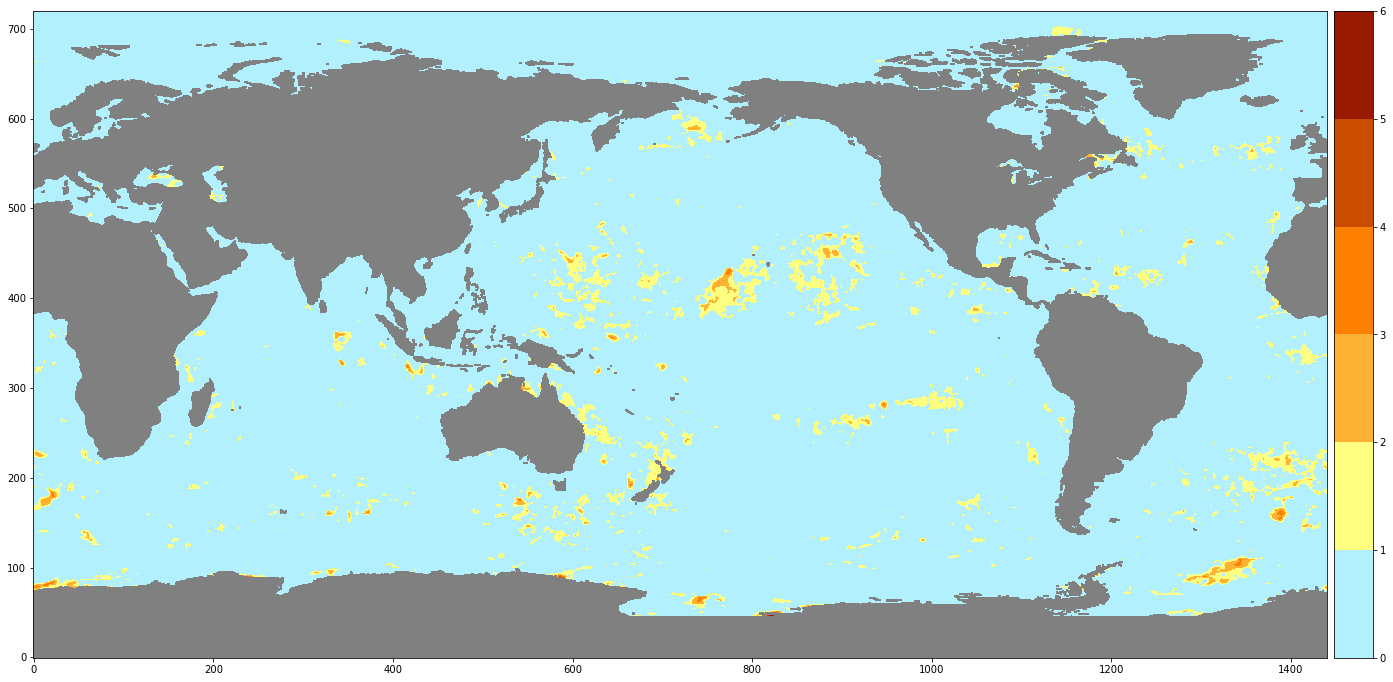

In [33]:
show_img(grade, grade=True)

# 2

In [4]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1'

In [5]:
base_data = get_data_by_date(base_dir=base_dir,
                 get_data_func=get_data_A,
                 var_name='sst',
                 start_date=(1991,1,1),
                 end_date=(2020,12,31))

  0%|          | 0/30 [00:00<?, ?it/s]

In [33]:
for i in range(1,10):
    data_12 = base_data[(1,i)]
    sst = data_12[-1]
    pctl = np.percentile(np.array(data_12), 90, axis=0)
    std = np.std(np.array(data_12), axis=0)
    np.place(pctl, pctl[:,:] == -999, np.nan)
    anomally = sst - pctl
    np.place(anomally, anomally[:,:] < 0, 0)
    grade = np.ceil(anomally / std)
    grade = masking(grade, np.invert(ice), fill_value=-1)
    save_img(crop(anomally, rok), f'/Volumes/T7/intermediate_output/additional_img_2/anomally_010{i}')
    save_img(crop(grade, rok), f'/Volumes/T7/intermediate_output/additional_img_2/grade_010{i}', grade=True)

/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_31161/3177413799.py:9: RuntimeWarning: invalid value encountered in true_divide
  grade = np.ceil(anomally / std)
